In [1]:
import numpy as np
import pandas as pd
import sympy

## Random

In [2]:
v = np.array([8,3,3])
vt = np.transpose(v)

In [3]:
np.matmul(vt,v)

82

In [4]:
np.dot(v,v)

82

In [5]:
v[0]*v[0] + v[1]*v[1] + v[2]*v[2]

82

## Math checks

In [6]:
m = np.array([
    [1, 2, 1, 3, 1, 4, 1, 50],
    [1, 2, 2, 2, 3, 2, 4, 20],
    [1, 2, 3, 4, 5, 6, 7, 80]
])

In [7]:
np.linalg.pinv(m)

array([[ 0.09540529,  0.12694315, -0.09150867],
       [ 0.19081058,  0.2538863 , -0.18301734],
       [ 0.00689826,  0.09634847, -0.02848114],
       [ 0.12729426,  0.16814683, -0.12137359],
       [-0.08160877,  0.06575378,  0.03454638],
       [ 0.06377793,  0.08240737, -0.05972985],
       [-0.1701158 ,  0.0351591 ,  0.09757391],
       [ 0.00261611, -0.03332094,  0.01913889]])

In [8]:
# mt = np.transpose(m)
# m_pinv = np.matmul(np.linalg.inv( np.matmul(mt,m) ), mt)
# m_pinv

In [9]:
mt = np.transpose(m)
m_pinv = np.matmul(mt, np.invert( np.matmul(m,mt) ))
m_pinv

array([[  -7620,   -3147,  -12273],
       [ -15240,   -6294,  -24546],
       [ -16763,   -6940,  -27030],
       [ -25888,  -10673,  -41685],
       [ -25906,  -10733,  -41787],
       [ -36536,  -15052,  -58824],
       [ -35049,  -14526,  -56544],
       [-471840, -194310, -759630]])

In [10]:
m = np.array([
    [3,2,2],
    [2,3,-2]
])
np.linalg.pinv(m)

array([[ 0.15555556,  0.04444444],
       [ 0.04444444,  0.15555556],
       [ 0.22222222, -0.22222222]])

In [11]:
def qr_householder(A):
    m, n = A.shape
    Q = np.eye(m) # Orthogonal transform so far
    R = A.copy() # Transformed matrix so far

    for j in range(n):
        if (j >= m-1):
            break
        # Find H = I - beta*u*u' to put zeros below R[j,j]
        x = R[j:, j]
        normx = np.linalg.norm(x)
        rho = -np.sign(x[0])
        u1 = x[0] - rho * normx
        u = x / u1
        u[0] = 1
        beta = -rho * u1 / normx
        print(beta)

        R[j:, :] = R[j:, :] - beta * np.outer(u, u).dot(R[j:, :])
        Q[:, j:] = Q[:, j:] - beta * Q[:, j:].dot(np.outer(u, u))
        print(R)
        
    return Q, R

A = np.array([
    [12,-51,4],
    [6,167,-68]
])
qr_householder(A)

1.8944271909999157
[[-13 -29  26]
 [  0 172 -62]]


(array([[-0.89442719, -0.4472136 ],
        [-0.4472136 ,  0.89442719]]),
 array([[-13, -29,  26],
        [  0, 172, -62]]))

## Coordenadas esféricas

In [12]:
v = [1,0,0]


theta = np.arctan2(np.linalg.norm((v[1],v[2])),v[0])
rho = np.arctan2(v[1], v[2])
print(f"theta: {theta}, rho: {rho}")

theta: 0.0, rho: 0.0


## Quaternions

In [13]:
import quaternion
# q1 = np.quaternion(1,0,0,0)
# q2 = quaternion.from_euler_angles(np.pi,0,0)
# q3 = quaternion.from_euler_angles(np.pi,0,np.pi/3)

# print(q2)
# print(q3)
# print(q2.conj())
# print(q2.conj()*q3)
# q_aux = q2.conj()*q3
# print((180/np.pi)*quaternion.as_rotation_vector(q_aux))

q_g_sp  = quaternion.from_euler_angles(0,0, -np.pi/12) # -15 degrees
q_sp_bp = quaternion.from_euler_angles(0,0, -np.pi/6)  # -30 degrees
q_g_b   = quaternion.from_euler_angles(0,0, -np.pi/2)  # -90 degrees

# Compute nonzero sensor to nonzero body
q_g_bp = q_g_sp*q_sp_bp
# Compute nonzero body to expected body at zero
q_bp_b = q_g_bp.conj()*q_g_b
# Compute nonzero sensor to zero body
q_zero = q_bp_b*q_sp_bp

quaternion.as_rotation_vector( q_zero )*180/np.pi
q_zero

quaternion(0.793353340291235, 0, 0, -0.60876142900872)

In [14]:
q_g_sp_new = quaternion.from_euler_angles(0,0, -np.pi/4)

quaternion.as_rotation_vector( q_zero*q_g_sp_new )*180/np.pi


array([   0.,    0., -120.])

In [15]:
from sympy.abc import a,b,c,d,x,y,z
from cmath import pi
roll,pitch,yaw = sympy.symbols('phi theta psi')

qx = sympy.Quaternion(sympy.cos(x/2),sympy.sin(x/2),0,0)
qy = sympy.Quaternion(sympy.cos(y/2),0,sympy.sin(y/2),0)
qz = sympy.Quaternion(sympy.cos(z/2),0,0,sympy.sin(z/2))

qxyz = qx*qy*qz
qzyx = qz*qy*qx
qyxz = qy*qx*qz
qzxy = qz*qx*qy
qyxz

(sin(x/2)*sin(y/2)*sin(z/2) + cos(x/2)*cos(y/2)*cos(z/2)) + (sin(x/2)*cos(y/2)*cos(z/2) + sin(y/2)*sin(z/2)*cos(x/2))*i + (-sin(x/2)*sin(z/2)*cos(y/2) + sin(y/2)*cos(x/2)*cos(z/2))*j + (-sin(x/2)*sin(y/2)*cos(z/2) + sin(z/2)*cos(x/2)*cos(y/2))*k

In [16]:
m_yxz = sympy.rot_axis2(y)*sympy.rot_axis1(x)*sympy.rot_axis3(z)
m_yxz

Matrix([
[-sin(x)*sin(y)*sin(z) + cos(y)*cos(z),  sin(x)*sin(y)*cos(z) + sin(z)*cos(y), -sin(y)*cos(x)],
[                       -sin(z)*cos(x),                         cos(x)*cos(z),         sin(x)],
[ sin(x)*sin(z)*cos(y) + sin(y)*cos(z), -sin(x)*cos(y)*cos(z) + sin(y)*sin(z),  cos(x)*cos(y)]])

In [17]:
qw,qx,qy,qz = sympy.symbols('q_w q_x q_y q_z')
q_m = sympy.Quaternion(qw,qx,qy,qz).to_rotation_matrix()
q_m

Matrix([
[-2*(q_y**2 + q_z**2)/(q_w**2 + q_x**2 + q_y**2 + q_z**2) + 1,   2*(-q_w*q_z + q_x*q_y)/(q_w**2 + q_x**2 + q_y**2 + q_z**2),    2*(q_w*q_y + q_x*q_z)/(q_w**2 + q_x**2 + q_y**2 + q_z**2)],
[   2*(q_w*q_z + q_x*q_y)/(q_w**2 + q_x**2 + q_y**2 + q_z**2), -2*(q_x**2 + q_z**2)/(q_w**2 + q_x**2 + q_y**2 + q_z**2) + 1,   2*(-q_w*q_x + q_y*q_z)/(q_w**2 + q_x**2 + q_y**2 + q_z**2)],
[  2*(-q_w*q_y + q_x*q_z)/(q_w**2 + q_x**2 + q_y**2 + q_z**2),    2*(q_w*q_x + q_y*q_z)/(q_w**2 + q_x**2 + q_y**2 + q_z**2), -2*(q_x**2 + q_y**2)/(q_w**2 + q_x**2 + q_y**2 + q_z**2) + 1]])

In [18]:
expr = m_yxz[0,2] + q_m[0,2]
expr

2*(q_w*q_y + q_x*q_z)/(q_w**2 + q_x**2 + q_y**2 + q_z**2) - sin(y)*cos(x)

In [19]:
qyxz.subs(x,pi/2).subs(y,0).subs(z,pi/2)

0.5 + 0.5*i + (-0.5)*j + 0.5*k

In [20]:
qyxz.subs(x,pi/2).subs(y,0).subs(z,pi/2)

0.5 + 0.5*i + (-0.5)*j + 0.5*k

In [21]:
qyxz.subs(((x,0),(y,pi/6),(z,pi/4)))

0.892399100832523 + 0.0990457605412876*i + 0.239117618394334*j + 0.369643810614386*k

#### Check operations


In [22]:
v1 = [-0.678947, -0.193230, 0.708303]
vz = [0, 0, 1]

q1_s_b = np.quaternion(0.924203, -0.104539, 0.367315, 0.000000)
print(f"Rotate v1 (sensor) with q1_s_b: \n\t{quaternion.rotate_vectors(q1_s_b,v1)}") 
q_sensor1 = np.quaternion(0.900815, 0.224250, 0.004303, -0.371788)
q1_g_bp = q1_s_b*q_sensor1
print(f"Rotate q_sensor1 (q_g_sp) with q1_sp_bp resulting in q1_g_bp: \n\t{q1_g_bp}") 
q1_bp_g = q1_g_bp.conj()
q1_g_bp_expected = np.quaternion(1, 0,0,0)
q1_bp_b = q1_g_bp_expected*q1_bp_g
print(f"Compute bp to b: \n\t{q1_bp_b}")
q1_zero = q1_bp_b*q1_s_b
print(f"Compute sp to b: \n\t{q1_zero}")


Rotate v1 (sensor) with q1_s_b: 
	[5.00412445e-07 5.86133473e-07 1.00000000e+00]
Rotate q_sensor1 (q_g_sp) with q1_sp_bp resulting in q1_g_bp: 
	quaternion(0.85439823975, -0.023481085755, 0.295993361502, -0.426427805031)
Compute bp to b: 
	quaternion(0.85439823975, 0.023481085755, -0.295993361502, 0.426427805031)
Compute sp to b: 
	quaternion(0.900814907175518, -0.224249976892159, -0.00430299955659737, 0.371787961689106)


In [23]:
v1 = [0.0, np.sin(pi/12), np.cos(pi/12)]
vz = [0, 0, 1]

q1_s_b = quaternion.from_rotation_vector(pi/12*np.array([1,0,0]))
print(f"Rotate v1 (sensor) with q1_s_b: \n\t{quaternion.rotate_vectors(q1_s_b,v1)}") 
q_sensor1 = quaternion.from_rotation_vector(-pi/4*np.array([1,0,0]))
q1_g_bp = q1_s_b*q_sensor1
print(f"Rotate q_sensor1 (q_g_sp) with q1_sp_bp resulting in q1_g_bp: \n\t{q1_g_bp}") 
q1_bp_g = q1_g_bp.conj()
q1_g_bp_expected = np.quaternion(1, 0,0,0)
q1_bp_b = q1_g_bp_expected*q1_bp_g
print(f"Compute bp to b: \n\t{q1_bp_b}")
q1_zero = q1_bp_b*q1_s_b
print(f"Compute sp to b: \n\t{q1_zero}")

Rotate v1 (sensor) with q1_s_b: 
	[ 0.00000000e+00 -1.22530028e-17  1.00000000e+00]
Rotate q_sensor1 (q_g_sp) with q1_sp_bp resulting in q1_g_bp: 
	quaternion(0.965925826289068, -0.258819045102521, 0, 0)
Compute bp to b: 
	quaternion(0.965925826289068, 0.258819045102521, 0, 0)
Compute sp to b: 
	quaternion(0.923879532511287, 0.38268343236509, 0, 0)


In [24]:
v1 = [np.cos(pi/6), -np.sin(pi/6), 0]
vx = [1, 0, 0]

q1_s_b = quaternion.from_rotation_vector(pi/6*np.array([0,0,1]))
print(f"Rotate v1 (sensor) with q1_s_b: \n\t{quaternion.rotate_vectors(q1_s_b,v1)}") 
q_sensor1 = quaternion.from_rotation_vector(-pi/4*np.array([1,0,0]))
q1_g_bp = q1_s_b*q_sensor1
print(f"Rotate q_sensor1 (q_g_sp) with q1_sp_bp resulting in q1_g_bp: \n\t{q1_g_bp}") 
q1_bp_g = q1_g_bp.conj()
q1_g_bp_expected = np.quaternion(1, 0,0,0)
q1_bp_b = q1_g_bp_expected*q1_bp_g
print(f"Compute bp to b: \n\t{q1_bp_b}")
q1_zero = q1_bp_b*q1_s_b
print(f"Compute sp to b: \n\t{q1_zero}")

Rotate v1 (sensor) with q1_s_b: 
	[1.00000000e+00 7.43708407e-18 0.00000000e+00]
Rotate q_sensor1 (q_g_sp) with q1_sp_bp resulting in q1_g_bp: 
	quaternion(0.892399100832523, -0.369643810614386, -0.0990457605412876, 0.239117618394334)
Compute bp to b: 
	quaternion(0.892399100832523, 0.369643810614386, 0.0990457605412876, -0.239117618394334)
Compute sp to b: 
	quaternion(0.923879532511287, 0.38268343236509, 1.38777878078145e-17, 2.77555756156289e-17)


In [25]:
c,s=sympy.symbols('c s')
Mx = sympy.Matrix([
    [1,0,0],
    [0,c,s],
    [0,-s,c]
])
Mz = sympy.Matrix([
    [c,s,0],
    [-s,c,0],
    [0,0,1]
])
Mz*sympy.Matrix([
    [1],
    [0],
    [0]
])

Matrix([
[ c],
[-s],
[ 0]])

## Plot Data

Open CSV file in "../test/tst_data/data8_onArmAbductionFromTposeAndBack.csv"


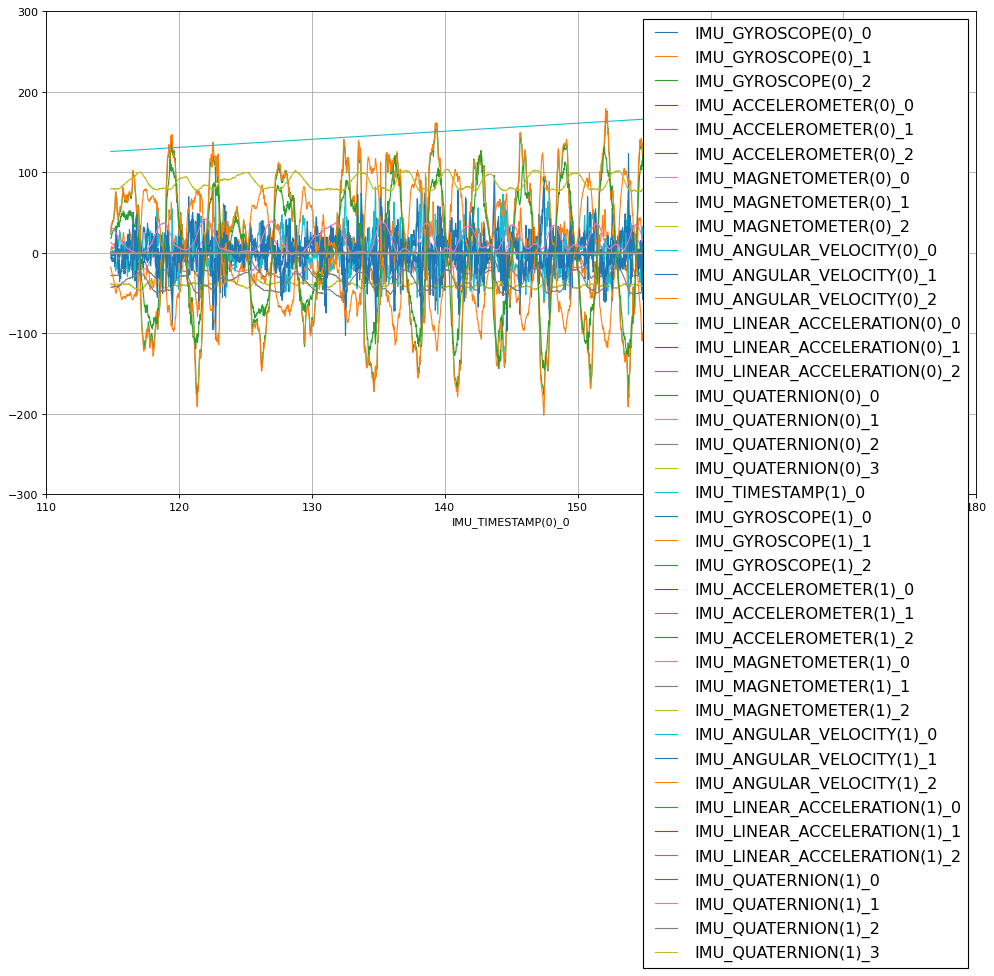

In [28]:
import os
import matplotlib.pyplot as plt

TST_DATA_DIR = "../test/tst_data/"
DATA_DIR = "../data/"

dirs = os.listdir(TST_DATA_DIR)
dirs.sort(reverse=True)

path = None
for d in dirs:
    if 'tst' not in d:
        path = TST_DATA_DIR+d 
        break

# path = "../data/tst_cal_005.csv"

if path is not None:
    print(f"Open CSV file in \"{path}\"")
    df = pd.read_csv(path)

    # Adjust plot style
    plt.figure(figsize=(15, 8), dpi=80)
    plt.grid(True)
    plt.style.use('classic')

    # Show plot
    for col in df.columns[1:]:
        plt.plot(df[df.columns[0]], df[col])
    plt.legend(df.columns[1:])
    plt.xlabel(df.columns[0])
    plt.show()

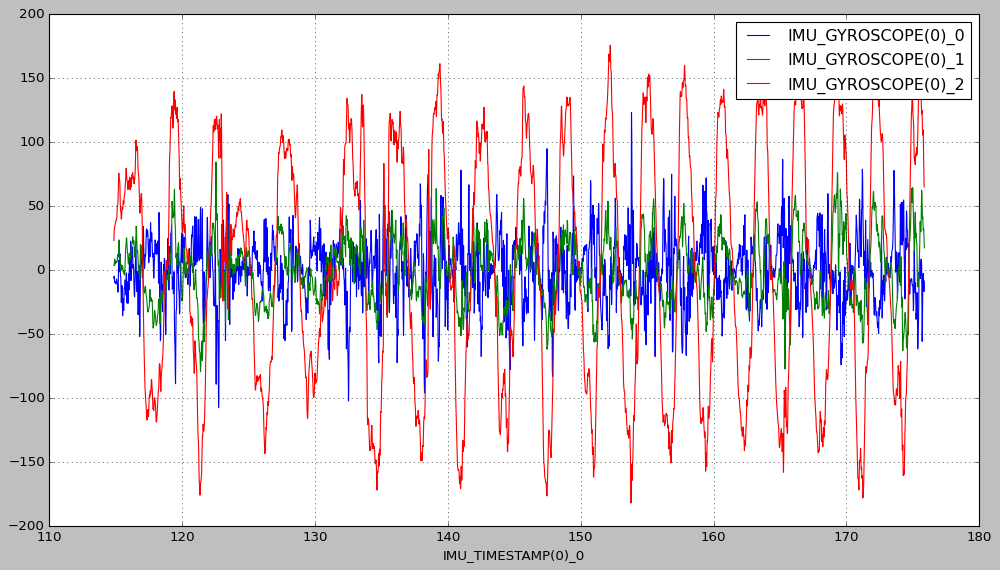

In [34]:
if path is not None:
    # Adjust plot style
    plt.figure(figsize=(15, 8), dpi=80)
    plt.grid(True)
    plt.style.use('classic')

    # Show alternative plot
    columns = []
    # columns = ["ARM_SHOULDER_ORIENTATION(0)_0", "ARM_SHOULDER_ORIENTATION(0)_1", "ARM_SHOULDER_ORIENTATION(0)_2", "ARM_SHOULDER_ORIENTATION(0)_3"]
    # columns += ["ARM_ELBOW_ORIENTATION(0)_0", "ARM_ELBOW_ORIENTATION(0)_1", "ARM_ELBOW_ORIENTATION(0)_2", "ARM_ELBOW_ORIENTATION(0)_3"]
    # columns += ["IMU_QUATERNION(1)_0", "IMU_QUATERNION(1)_1", "IMU_QUATERNION(1)_2", "IMU_QUATERNION(1)_3"]
    # columns += ["CALIB_ROT_VECTOR(0)_0", "CALIB_ROT_VECTOR(0)_1", "CALIB_ROT_VECTOR(0)_2"]
    # columns += ["CALIB_ROT_VECTOR(1)_0", "CALIB_ROT_VECTOR(1)_1", "CALIB_ROT_VECTOR(1)_2"]
    # columns += ["CALIB_ERROR(0)_0"]
    # columns += ["CALIB_COST_DERIVATIVE(0)_0", "CALIB_COST_DERIVATIVE(0)_1", "CALIB_COST_DERIVATIVE(1)_0", "CALIB_COST_DERIVATIVE(1)_1"]

    # columns += ["ARM_SHOULDER_ORIENTATION(0)_0", "IMU_QUATERNION(0)_0"]

    columns += ["IMU_GYROSCOPE(0)_0", "IMU_GYROSCOPE(0)_1", "IMU_GYROSCOPE(0)_2"]

    legend = []
    for col in columns:
        if col in df.columns[1:]:
            plt.plot(df[df.columns[0]], df[col])
            legend.append(col)
    plt.legend(legend)
    plt.xlabel(df.columns[0])
    # plt.savefig('imuGyr.png')
    plt.show()